This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

https://keras.io/api/metrics/accuracy_metrics/

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [ ]:
#define model

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),  3*64
    layers.Dense(10, activation="softmax")
])
#방법1

**Incrementally building a Sequential model**

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
#방법2

**Calling a model for the first time to build it**

In [ ]:
#input shape 알아보기

In [3]:
model.build(input_shape=(None, 3)) #input 3차원
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.06255743, -0.29889444, -0.07283467, -0.08513162, -0.13374625,
          0.11473972,  0.09434691,  0.26907176,  0.24020016,  0.21072125,
          0.26169026,  0.02091014,  0.07991332, -0.20054236, -0.04188764,
         -0.17115778, -0.29716426,  0.01711375, -0.06320141,  0.23757565,
          0.25608438, -0.06416453, -0.04292569,  0.00253418, -0.11487186,
          0.07350478, -0.228612  , -0.25535515,  0.23583144,  0.09670851,
         -0.03689924,  0.02012098, -0.12996748,  0.26340085, -0.24285552,
         -0.2822918 , -0.19302106,  0.06139326,  0.25081587,  0.2780885 ,
         -0.07363319, -0.02742538, -0.19409755,  0.09465864, -0.15039931,
          0.21291351, -0.16036811,  0.29919547, -0.07176717,  0.22491086,
         -0.12030968, -0.22100958,  0.0562118 ,  0.07833114, -0.15702164,
          0.08619305,  0.10620072, -0.05961826,  0.22407353,  0.24973065,
         -0.19095875,  0.1681397 ,  0.08116

**The summary method**

In [4]:
model.summary() #3*64
#input

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Naming models and layers with the `name` argument**

In [5]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Specifying the input shape of your model in advance**

In [ ]:
#add layers

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### The Functional API

In [ ]:
#multy inputs and outputs 일 때

#### A simple example

**A simple Functional model with two `Dense` layers**

In [10]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
inputs = keras.Input(shape=(3,), name="my_input")

In [12]:
inputs.shape

TensorShape([None, 3])

In [13]:
inputs.dtype

tf.float32

In [14]:
features = layers.Dense(64, activation="relu")(inputs)

In [15]:
features.shape

TensorShape([None, 64])

In [16]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 64)                256       
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [18]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features) #multioutput 1
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features) #output2

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [ ]:
#원핫엔코딩 일 때는 categorical_Crossentropy
#mean_squared_Error 는 그냥 되어있을 때

In [19]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


In [ ]:
#체크해보기

In [23]:
import numpy as np

num_samples = 100 #100개 샘플

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))


title_data.shape #랜덤체크

(100, 10000)

In [24]:
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

priority_data

array([[0.91111346],
       [0.97717503],
       [0.27972895],
       [0.82539409],
       [0.72515268],
       [0.62421944],
       [0.43165036],
       [0.11516414],
       [0.32909851],
       [0.33791358],
       [0.82818934],
       [0.59963341],
       [0.28651397],
       [0.2461127 ],
       [0.24476133],
       [0.9744037 ],
       [0.20551289],
       [0.15590513],
       [0.07174355],
       [0.2273296 ],
       [0.47296768],
       [0.94025331],
       [0.89713033],
       [0.28174823],
       [0.17298249],
       [0.27577537],
       [0.97941493],
       [0.47051277],
       [0.66900883],
       [0.99985359],
       [0.99322777],
       [0.00104612],
       [0.51476772],
       [0.43172408],
       [0.02510674],
       [0.7115931 ],
       [0.04812256],
       [0.12778196],
       [0.36404309],
       [0.36633644],
       [0.64382758],
       [0.45207935],
       [0.77815439],
       [0.47838279],
       [0.89390813],
       [0.747388  ],
       [0.65321968],
       [0.889

**Training a model by providing dicts of input & target arrays**

In [20]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


#### The power of the Functional API: Access to layer connectivity

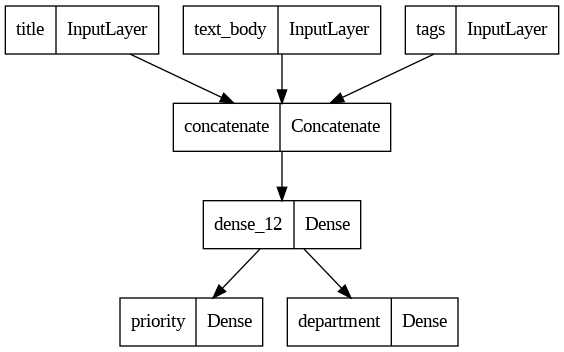

In [21]:
keras.utils.plot_model(model, "ticket_classifier.png")

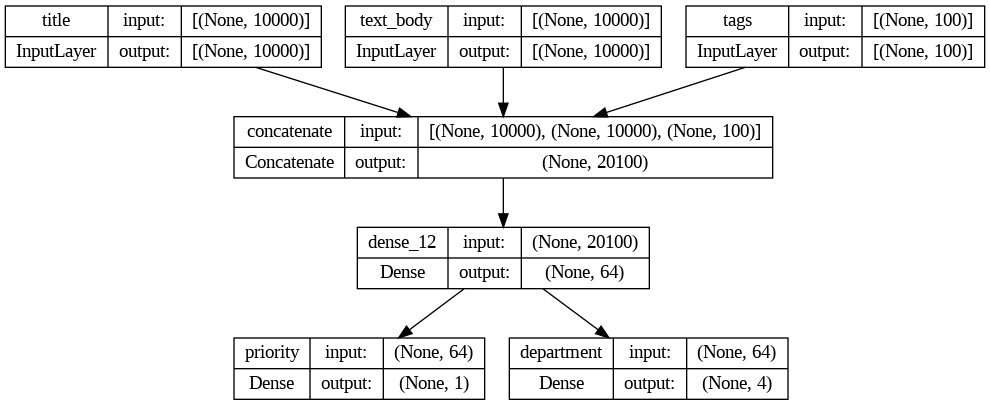

In [22]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

In [25]:
model.layers # 0 1 2 3 번쨰 가 <keras.src.layers.merging.concatenate.Concatenate at 0x7ac3eab58b50>, 다음 코드

In [26]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [27]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

**Creating a new model by reusing intermediate layer outputs**

In [30]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_12')>

In [31]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]) #new model #difficulty 더해짐

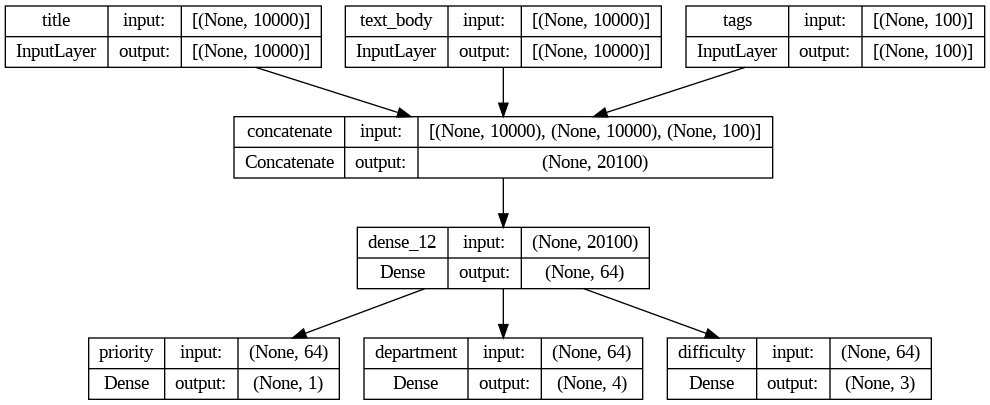

In [32]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True) #추가된 difficulty layer에 연결됨



---



In [ ]:
#1.

In [33]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)
features = layers.Dense(36, activation="relu")(features)
features = layers.Dense(24, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features) #multioutput 1
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features) #output2

model1 = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

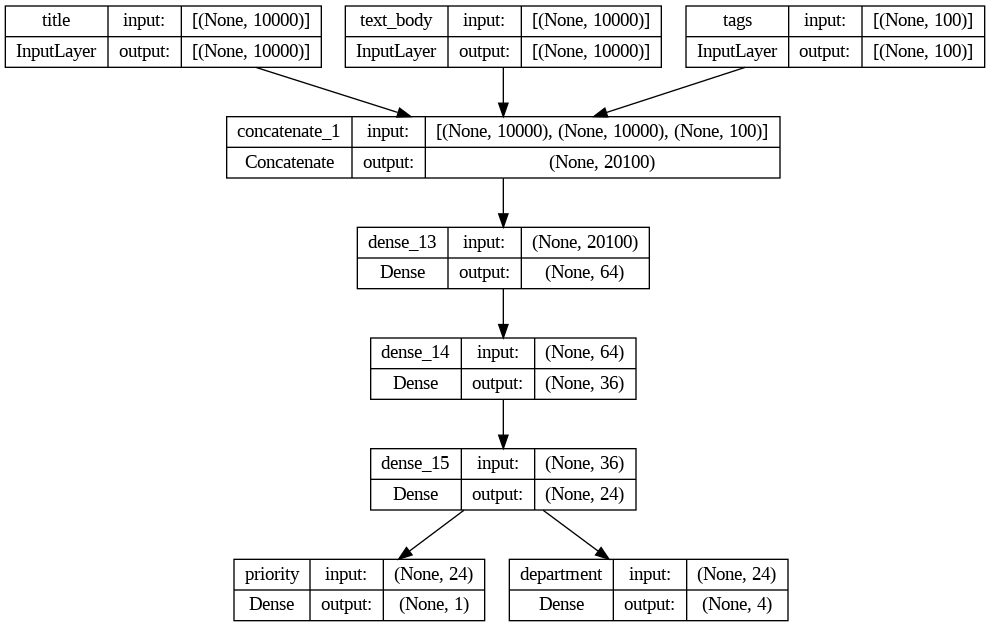

In [42]:
keras.utils.plot_model(model1,"1.png", show_shapes=True)

In [52]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)
features = layers.Dense(36, activation="relu")(features)
features = layers.Dense(24, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features) #multioutput 1
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features) #output2

model2 = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [53]:
f1 = model2.layers[5].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(f1)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

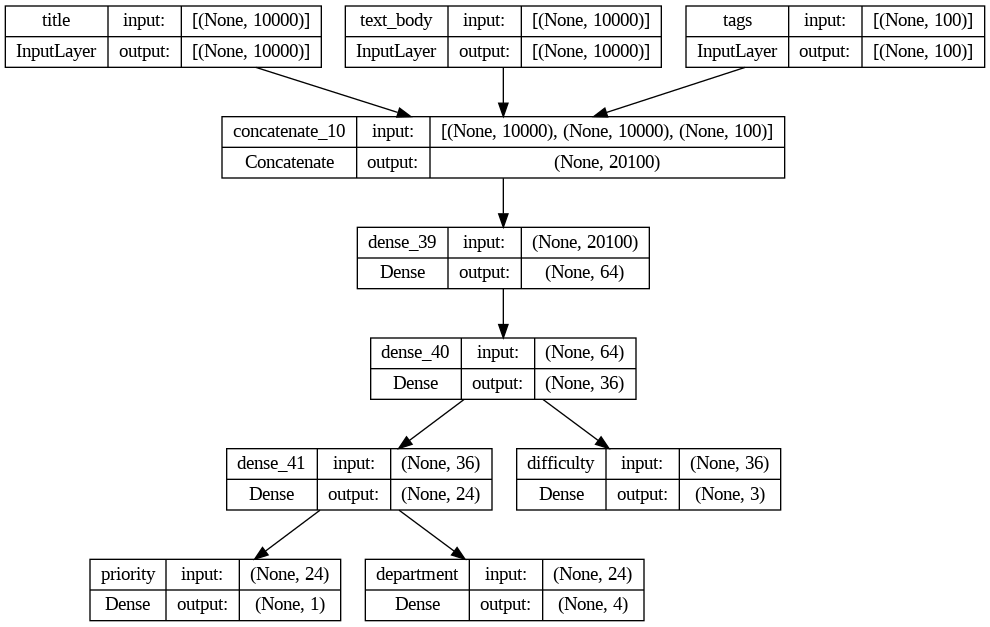

In [54]:
keras.utils.plot_model(new_model,"2.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [ ]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [ ]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [ ]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [ ]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [ ]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [55]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 7s 3ms/step - loss: 0.2935 - accuracy: 0.9125 - val_loss: 0.1393 - val_accuracy: 0.9585
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1578 - accuracy: 0.9553 - val_loss: 0.1081 - val_accuracy: 0.9703
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [62]:
labels[:5]  #1. 원핫인코딩으로 바꿔주기

array([5, 0, 4, 1, 9], dtype=uint8)

In [64]:
import tensorflow as tf # update_state, result, reset_State

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1]) #1. 원핫인코딩으로 바꿔주기
        mse = tf.reduce_sum(tf.square(y_true - y_pred)) #2. mse 계산
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [65]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2948 - accuracy: 0.9123 - rmse: 7.1735 - val_loss: 0.1484 - val_accuracy: 0.9574 - val_rmse: 7.3574
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1615 - accuracy: 0.9530 - rmse: 7.3492 - val_loss: 0.1147 - val_accuracy: 0.9675 - val_rmse: 7.4024
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9735 - rmse: 7.4315


### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [66]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, #fit 안에 call back 넣을 수 있음
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2968 - accuracy: 0.9115 - val_loss: 0.1449 - val_accuracy: 0.9574
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1626 - accuracy: 0.9532 - val_loss: 0.1142 - val_accuracy: 0.9680
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1312 - accuracy: 0.9624 - val_loss: 0.1020 - val_accuracy: 0.9718
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1141 - accuracy: 0.9684 - val_loss: 0.1044 - val_accuracy: 0.9725
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1024 - accuracy: 0.9708 - val_loss: 0.0998 - val_accuracy: 0.9751
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0963 - accuracy: 0.9735 - val_loss: 0.0961 - val_accuracy: 0.9760
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9751 - val_loss: 0.0950 - val_accuracy:

In [67]:
model = keras.models.load_model("checkpoint_path.keras")



---

From using callbacks, experiment with different parameters of EarlyStopping and Mod
elCheckpoint callbacks.
ex) saving models for every epochs

In [ ]:
#save_best_only=False: 다 저장

In [69]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=False,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, #fit 안에 call back 넣을 수 있음
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2983 - accuracy: 0.9116 - val_loss: 0.1467 - val_accuracy: 0.9586
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1601 - accuracy: 0.9543 - val_loss: 0.1184 - val_accuracy: 0.9649
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1307 - accuracy: 0.9638 - val_loss: 0.1021 - val_accuracy: 0.9725
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1128 - accuracy: 0.9679 - val_loss: 0.0981 - val_accuracy: 0.9752
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1057 - accuracy: 0.9701 - val_loss: 0.0990 - val_accuracy: 0.9769
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0941 - accuracy: 0.9741 - val_loss: 0.0897 - val_accuracy: 0.9776
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.9765 - val_loss: 0.0899 - val_accuracy:

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [ ]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [57]:
metric = keras.metrics.SparseCategoricalAccuracy() #SparseCategoricalAccuracy 일 때 y label [0,1,2 ]포멧
targets = [0, 1, 2] #트레이닝 3개 샘플로
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [59]:
#이전 트레이닝을 기억함
targets = [0,1,1]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 0.67


In [61]:
metric.reset_state()

In [58]:
metric = keras.metrics.CategoricalAccuracy() #SparseCategoricalAccuracy 아니면 y label [[1,0,0], [0,1,0]] 이런 포멧
targets = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [72]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

@tf.function #Modify your training run on GPUs
def train_step(inputs, targets): # 1563 times train step function 돌아 (batch )
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [73]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [74]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9134
...loss: 0.2894
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9542
...loss: 0.1575
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9626
...loss: 0.1325


In [75]:
#Set batch size as 100, and modify your built-in training loop to output logs for every batch updates


training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(100)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
        for key, value in logs.items():
            print(f"...{key}: {value:.4f}")

    print(f"Results at the end of epoch {epoch}")


...sparse_categorical_accuracy: 0.9400
...loss: 0.2754
...sparse_categorical_accuracy: 0.9550
...loss: 0.2096
...sparse_categorical_accuracy: 0.9267
...loss: 0.2754
...sparse_categorical_accuracy: 0.9400
...loss: 0.2149
...sparse_categorical_accuracy: 0.9480
...loss: 0.1870
...sparse_categorical_accuracy: 0.9500
...loss: 0.1705
...sparse_categorical_accuracy: 0.9543
...loss: 0.1504
...sparse_categorical_accuracy: 0.9513
...loss: 0.1556
...sparse_categorical_accuracy: 0.9556
...loss: 0.1437
...sparse_categorical_accuracy: 0.9570
...loss: 0.1384
...sparse_categorical_accuracy: 0.9600
...loss: 0.1296
...sparse_categorical_accuracy: 0.9625
...loss: 0.1220
...sparse_categorical_accuracy: 0.9631
...loss: 0.1213
...sparse_categorical_accuracy: 0.9650
...loss: 0.1154
...sparse_categorical_accuracy: 0.9660
...loss: 0.1138
...sparse_categorical_accuracy: 0.9663
...loss: 0.1123
...sparse_categorical_accuracy: 0.9665
...loss: 0.1118
...sparse_categorical_accuracy: 0.9650
...loss: 0.1149
...sparse_

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)



---

- Set batch size as 100, and modify your built-in training loop to output logs for every ba
tch updates
- Modify your training run on GPUs

In [ ]:
#Modify your training run on GPUs
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

@tf.function #Modify your training run on GPUs
def train_step(inputs, targets): # 1563 times train step function 돌아 (batch )
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

In [ ]:
#Set batch size as 100, and modify your built-in training loop to output logs for every batch updates


training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(100)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
        for key, value in logs.items():
            print(f"...{key}: {value:.4f}")

    print(f"Results at the end of epoch {epoch}")


## Summary